In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import RobustScaler
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [9]:
!pip install scikit-plot

In [62]:
!pip install imblearn

In [110]:
!pip install ppscore

  Created wheel for ppscore: filename=ppscore-0.0.2-py2.py3-none-any.whl size=9629 sha256=e7361a3a9fd9acb3df1fd28a97bdbbc2e69fb8088523bcf01f6dc63aae13229e
  Stored in directory: /root/.cache/pip/wheels/29/32/a2/82782fc09f5cd68e401ff047201d38af8965fb94984db18aa5
Successfully built ppscore


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix,precision_recall_fscore_support,accuracy_score

from imblearn.over_sampling import SMOTE

import ppscore as pps

import scikitplot as skplt

In [0]:
cc = pd.read_csv('/content/drive/My Drive/creditcard.csv')

In [4]:
cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


variables V1 - V28 are deidentified customer or trasanction information fields. heopefully these are scaled as can be seen based on the range of each column.

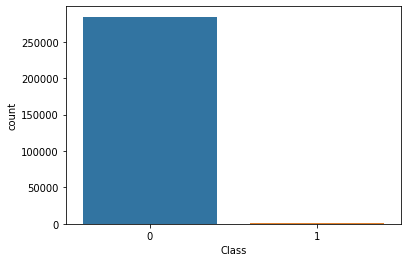

In [5]:
sns.countplot(cc['Class'])

In [6]:
print('Class 0:',len(cc[cc['Class'] == 0]))
print('Class 1:',len(cc[cc['Class'] == 1]))
print('Class 0:{0:8.2f}%'.format(len(cc[cc['Class'] == 0]) * 100/len(cc)))
print('Class 1:{0:8.2f}%'.format(len(cc[cc['Class'] == 1]) * 100/len(cc)))

Class 0: 284315
Class 1: 492
Class 0:   99.83%
Class 1:    0.17%


Lets try to fit 1 basic and 1 advanced model to this data set to see the performance of the models.

In [0]:
rob_scaler = RobustScaler()

cc['Time'] = rob_scaler.fit_transform(cc['Time'].values.reshape(-1,1))
cc['Amount'] = rob_scaler.fit_transform(cc['Amount'].values.reshape(-1,1))

In [31]:
cc.isnull().sum()/len(cc)

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

In [112]:
imp_cols = []
for i in cc.columns:
    if pps.score(cc, i, "Class")['ppscore'] > 0:
        print(i, pps.score(cc, i, "Class")['ppscore'])
        imp_cols.append(i)

V10 0.5504822952702065
V11 0.328178453526289
V12 0.33485266097440686
V14 0.6417635910686477
V16 0.14299701809245202
V17 0.6122440681684805
Class 1


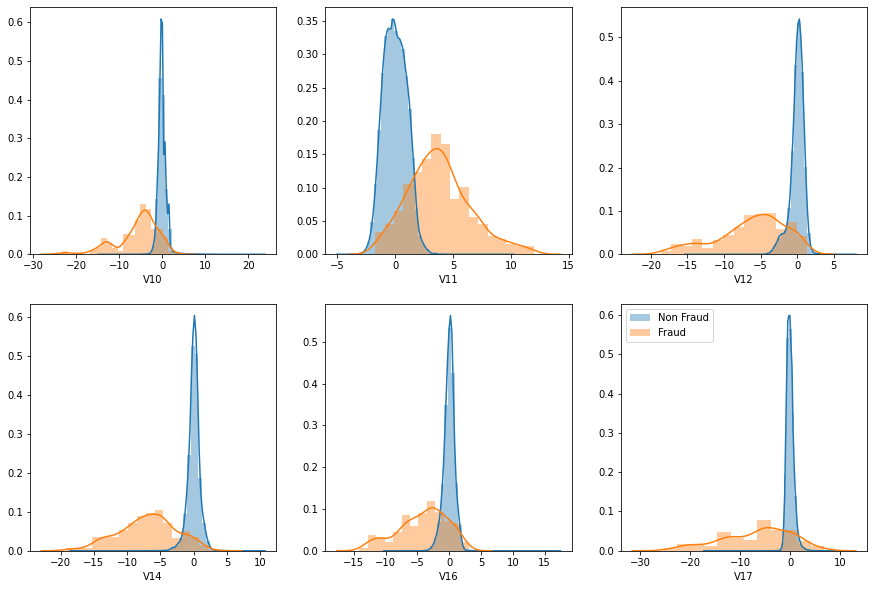

In [130]:
f, axes = plt.subplots(2, 3, figsize=(15, 10))
k=0
j=0
for i in imp_cols[:-1]:
    sns.distplot(cc[cc['Class'] == 0][i],label='Non Fraud',ax=axes[k,j])
    sns.distplot(cc[cc['Class'] == 1][i],label='Fraud',ax=axes[k,j])
    j+=1
    if j==3:
      j=0
      k+=1
plt.legend()
plt.show()

In [0]:
X = cc.drop(['Class'],axis=1)
Y = cc['Class']

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [0]:
log_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [14]:
log_model = GridSearchCV(LogisticRegression(), log_params,cv=5, n_jobs=-1,scoring='recall')
log_model.fit(X_train,Y_train)
print(log_model.best_params_)
print(log_model.best_score_)

{'C': 10, 'penalty': 'l2'}
0.6294709509899383


In [0]:
log_model = LogisticRegression(C=10,penalty='l2',random_state=42)
log_model.fit(X_train, Y_train)

y_score = log_model.predict_proba(X_test)

In [16]:
y_pred = log_model.fit(X_train, Y_train).predict(X_test)
Logit_test = metrics.recall_score(Y_test, y_pred)
print("Logistic test score:",Logit_test)

Logistic test score: 0.5816326530612245


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy: 0.9991222218320986
Precision: 0.9990460205620223
Recall: 0.9991222218320986
F score: 0.9990367083945141


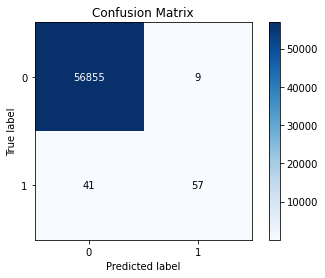

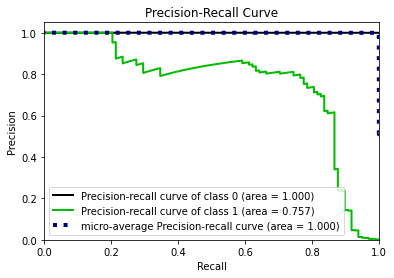

In [17]:
conf_mat = confusion_matrix(Y_test, y_pred)
accuracy = accuracy_score(Y_test, y_pred)
score = precision_recall_fscore_support(Y_test, y_pred, average='weighted')
precision, recall, fscore, k = score
skplt.metrics.plot_confusion_matrix(Y_test, y_pred)
skplt.metrics.plot_precision_recall_curve(Y_test, y_score)
print(classification_report(Y_test, y_pred))
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F score:",fscore)

In [22]:
!pip install bayesian-optimization

In [0]:
from bayes_opt import BayesianOptimization
import xgboost as xgb

In [27]:
dtrain = xgb.DMatrix(X_train, label=Y_train)

#Bayesian Optimization function for xgboost
#specify the parameters you want to tune as keyword arguments
def bo_tune_xgb(max_depth, gamma, n_estimators ,learning_rate):
  params = {'max_depth': int(max_depth),
              'gamma': gamma,
              'n_estimators': int(n_estimators),
              'learning_rate':learning_rate,
              'subsample': 0.8,
              'eta': 0.1,
              'eval_metric': 'auc'}
    #Cross validating with the specified parameters in 5 folds and 70 iterations
  cv_result = xgb.cv(params, dtrain, num_boost_round=70, nfold=5)
    #Return the auc
  return cv_result['test-auc-mean'].iloc[-1]

#Invoking the Bayesian Optimizer with the specified parameters to tune
xgb_bo = BayesianOptimization(bo_tune_xgb, {'max_depth': (3, 10),
                                             'gamma': (0, 1),
                                             'learning_rate':(0,1),
                                             'n_estimators':(100,1000)
                                            })

#performing Bayesian optimization for 5 iterations with 8 steps of random exploration with an #acquisition function of expected improvement
xgb_bo.maximize(n_iter=5, init_points=8, acq='ei')

|   iter    |  target   |   gamma   | learni... | max_depth | n_esti... |
-------------------------------------------------------------------------
|  1        |  0.9194   |  0.7902   |  0.8131   |  9.848    |  833.2    |
|  2        |  0.9612   |  0.1614   |  0.1917   |  4.944    |  963.9    |
|  3        |  0.9167   |  0.7439   |  0.1672   |  3.105    |  235.9    |
|  4        |  0.9545   |  0.1953   |  0.4812   |  4.01     |  103.8    |
|  5        |  0.9522   |  0.05337  |  0.5522   |  5.676    |  431.1    |
|  6        |  0.9101   |  0.7267   |  0.9355   |  4.206    |  711.1    |
|  7        |  0.9519   |  0.05765  |  0.5198   |  3.379    |  407.4    |
|  8        |  0.9512   |  0.1203   |  0.5753   |  8.469    |  518.1    |
|  9        |  0.9259   |  0.7561   |  0.6701   |  5.799    |  1e+03    |
|  10       |  0.918    |  0.127    |  0.004992 |  7.853    |  963.5    |
|  11       |  0.9118   |  0.2424   |  0.9158   |  3.071    |  892.7    |
|  12       |  0.8995   |  1.0      | 

In [0]:
xgb_model = xgb.XGBClassifier(n_estimators=964,learning_rate=0.19,gamma=0.16,max_depth=5)
xgb_model.fit(X_train, Y_train)

y_score = xgb_model.predict_proba(X_test)

In [29]:
y_pred = xgb_model.predict(X_test)
xgb_test = metrics.recall_score(Y_test, y_pred)
print("XGB test score:",xgb_test)

XGB test score: 0.8061224489795918


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.81      0.89        98

    accuracy                           1.00     56962
   macro avg       0.99      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy: 0.9996488887328394
Precision: 0.9996450442829751
Recall: 0.9996488887328394
F score: 0.9996311636971695


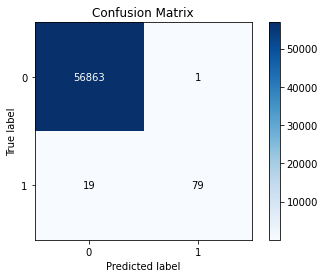

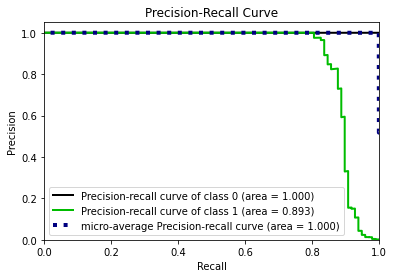

In [30]:
conf_mat = confusion_matrix(Y_test, y_pred)
accuracy = accuracy_score(Y_test, y_pred)
score = precision_recall_fscore_support(Y_test, y_pred, average='weighted')
precision, recall, fscore, k = score
skplt.metrics.plot_confusion_matrix(Y_test, y_pred)
skplt.metrics.plot_precision_recall_curve(Y_test, y_score)
print(classification_report(Y_test, y_pred))
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F score:",fscore)

XGboost does really good job at this even on the imbalanced data. Lets try the below 3 different approaches from here on to check if we can improve this performance.

1) Undersmaple the class 0

2) Oversample the class 1

3) Combination of above 2


The test will remain the same to ensure the same ground comparision for all approaches. We are going to perform the above approaches on the training data.

### Undersampling Class 0

In [36]:
Y_train.value_counts()

0    227451
1       394
Name: Class, dtype: int64

In [0]:
cc_0 = pd.concat([X_train,Y_train],axis=1)

In [0]:
cc_1 = cc_0[cc_0['Class']==1]
cc_0 = cc_0[cc_0['Class']==0]

We can take a random sample of size 394 from the class 0 and then run ML models to see the performance of the models in this data and the original dataset as the real world predictions need to be on the original data.

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit

In [44]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.0018, random_state=42)
for train_index, test_index in split.split(cc_0, cc_0['Class']):
    strat_train_set = cc_0.iloc[train_index,:]
    strat_test_set = cc_0.iloc[test_index,:]
strat_test_set.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
87268,-0.271209,-0.523557,0.419637,0.521676,-2.205197,1.021148,0.411423,1.051972,0.214867,0.320478,-1.804641,0.727641,1.257002,0.537520,0.418545,1.589079,-1.798652,0.695392,-2.485828,-1.505691,-0.183362,-0.063195,-0.073153,0.316542,-0.993255,-0.829123,-1.194567,0.246902,0.180463,0.418221,0
208581,0.616678,2.097934,-0.006747,-1.337829,0.248597,0.290266,-0.788011,0.258939,-0.359142,0.410758,0.036570,-1.159424,0.833565,1.357236,0.002575,-0.037019,0.042363,-0.605988,-0.786353,0.396379,-0.112346,-0.316881,-0.734260,0.234395,-0.622309,-0.169183,0.234098,-0.065344,-0.063178,-0.181793,0
71437,-0.357100,1.295257,0.226208,0.301398,0.505498,-0.251137,-0.711508,0.041182,-0.165244,0.101775,-0.060599,-0.686807,0.125532,0.253069,0.239127,1.084646,0.455063,-0.595561,-0.361515,0.069828,-0.086693,-0.291910,-0.848371,0.076693,-0.124014,0.278886,0.125990,-0.030685,0.013646,-0.282401,0
150295,0.097428,2.045364,-0.299853,-0.513844,0.490228,-0.210895,0.031482,-0.679271,-0.104368,2.760035,-0.548524,-0.895892,-2.134388,2.368206,1.089301,-0.234637,0.326563,-0.167174,0.755773,-0.049416,-0.197630,-0.018010,0.474950,-0.005344,-1.027380,0.031966,-0.191122,0.015914,-0.051745,-0.125900,0
93899,-0.235611,-0.329882,0.948924,0.930639,-0.143105,0.422714,-0.142072,0.496805,0.208572,-0.091974,-0.502930,-0.927389,-1.133127,-1.468384,-0.107826,1.384312,0.380434,0.120170,-0.144314,-0.164193,-0.008370,-0.304748,-0.846746,-0.060360,-0.749705,-0.194958,0.152296,0.250968,0.083698,-0.294977,0


In [0]:
us_cc = pd.concat([strat_test_set, cc_1])

In [47]:
us_cc

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
87268,-0.271209,-0.523557,0.419637,0.521676,-2.205197,1.021148,0.411423,1.051972,0.214867,0.320478,-1.804641,0.727641,1.257002,0.537520,0.418545,1.589079,-1.798652,0.695392,-2.485828,-1.505691,-0.183362,-0.063195,-0.073153,0.316542,-0.993255,-0.829123,-1.194567,0.246902,0.180463,0.418221,0
208581,0.616678,2.097934,-0.006747,-1.337829,0.248597,0.290266,-0.788011,0.258939,-0.359142,0.410758,0.036570,-1.159424,0.833565,1.357236,0.002575,-0.037019,0.042363,-0.605988,-0.786353,0.396379,-0.112346,-0.316881,-0.734260,0.234395,-0.622309,-0.169183,0.234098,-0.065344,-0.063178,-0.181793,0
71437,-0.357100,1.295257,0.226208,0.301398,0.505498,-0.251137,-0.711508,0.041182,-0.165244,0.101775,-0.060599,-0.686807,0.125532,0.253069,0.239127,1.084646,0.455063,-0.595561,-0.361515,0.069828,-0.086693,-0.291910,-0.848371,0.076693,-0.124014,0.278886,0.125990,-0.030685,0.013646,-0.282401,0
150295,0.097428,2.045364,-0.299853,-0.513844,0.490228,-0.210895,0.031482,-0.679271,-0.104368,2.760035,-0.548524,-0.895892,-2.134388,2.368206,1.089301,-0.234637,0.326563,-0.167174,0.755773,-0.049416,-0.197630,-0.018010,0.474950,-0.005344,-1.027380,0.031966,-0.191122,0.015914,-0.051745,-0.125900,0
93899,-0.235611,-0.329882,0.948924,0.930639,-0.143105,0.422714,-0.142072,0.496805,0.208572,-0.091974,-0.502930,-0.927389,-1.133127,-1.468384,-0.107826,1.384312,0.380434,0.120170,-0.144314,-0.164193,-0.008370,-0.304748,-0.846746,-0.060360,-0.749705,-0.194958,0.152296,0.250968,0.083698,-0.294977,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42674,-0.511026,-7.896886,5.381020,-8.451162,7.963928,-7.862419,-2.376820,-11.949723,5.051356,-6.912076,-11.589748,6.645201,-13.542096,0.888248,-12.623316,1.002755,-12.432279,-23.241597,-8.495299,3.453943,0.645974,2.557944,0.926278,0.032795,0.638073,0.361887,0.444577,1.101923,0.205958,-0.286173,1
33276,-0.558336,-7.923891,-5.198360,-3.000024,4.420666,2.272194,-3.394483,-5.283435,0.131619,0.658176,-0.794994,3.266066,-2.719185,-0.124104,-5.274866,0.638575,-2.995830,-4.698433,-1.711871,3.025261,-2.169811,-0.734308,-0.599926,-4.908301,0.410170,-1.167660,0.520508,1.937421,-1.552593,-0.135401,1
182992,0.480739,1.889618,1.073099,-1.678018,4.173268,1.015516,-0.009389,-0.079706,0.064071,-0.714517,0.042228,-0.408403,-0.929370,0.058686,-3.512845,-0.164613,2.069853,1.733382,1.580758,-2.335185,-0.153570,0.203728,0.733796,-0.036560,0.334306,0.147171,0.279556,0.031669,0.035883,-0.262419,1
154697,0.210682,-4.221221,2.871121,-5.888716,6.890952,-3.404894,-1.154394,-7.739928,2.851363,-2.507569,-5.110728,5.350890,-9.299807,2.793140,-6.106552,-2.106947,-6.250629,-13.566325,-4.192780,0.510570,-0.227882,1.620591,1.567947,-0.578007,-0.059045,-1.829169,-0.072429,0.136734,-0.599848,-0.201355,1


In [0]:
us_cc = us_cc.reset_index(drop=True)

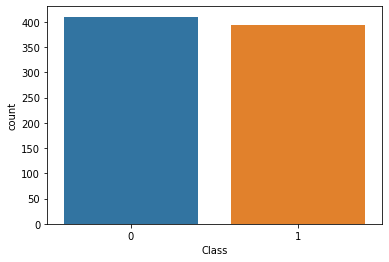

In [49]:
sns.countplot(us_cc['Class'])

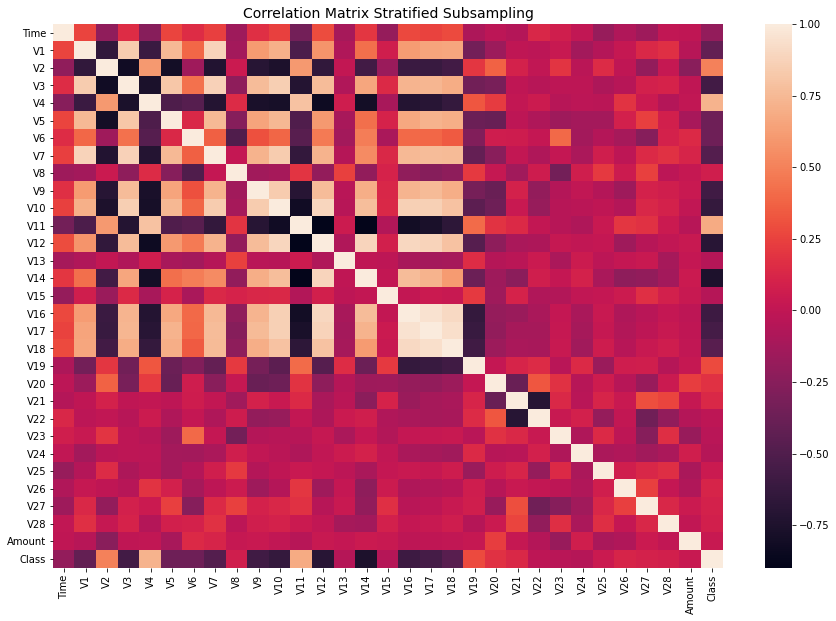

In [50]:
SSS_corr = us_cc.corr()
plt.figure(figsize=(15,10))
sns.heatmap(SSS_corr, annot_kws={'size':20})
plt.title('Correlation Matrix Stratified Subsampling', fontsize=14)
plt.show()

In [0]:
X_train_us = us_cc.drop(['Class'],axis=1)
Y_train_us = us_cc['Class']

In [0]:
log_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [53]:
log_model = GridSearchCV(LogisticRegression(), log_params,cv=5, n_jobs=-1,scoring='recall')
log_model.fit(X_train_us,Y_train_us)
print(log_model.best_params_)
print(log_model.best_score_)

{'C': 1000, 'penalty': 'l2'}
0.9163583252190847


In [0]:
log_model = LogisticRegression(C=1000,penalty='l2',random_state=42)
log_model.fit(X_train_us, Y_train_us)

y_score = log_model.predict_proba(X_test)

In [55]:
y_pred = log_model.predict(X_test)
Logit_test = metrics.recall_score(Y_test, y_pred)
print("Logistic test score:",Logit_test)

Logistic test score: 0.9387755102040817


              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.94      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.95      0.52     56962
weighted avg       1.00      0.96      0.98     56962

Accuracy: 0.9572522032232015
Precision: 0.9982323183386048
Recall: 0.9572522032232015
F score: 0.9765612390228968


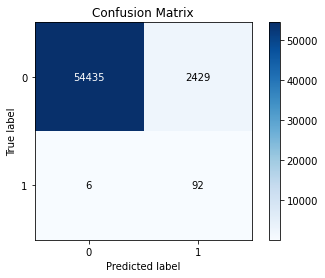

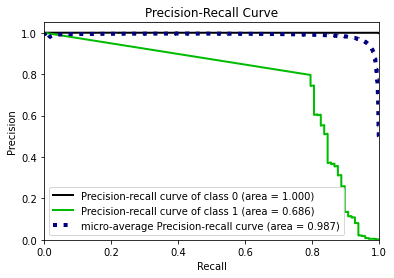

In [56]:
conf_mat = confusion_matrix(Y_test, y_pred)
accuracy = accuracy_score(Y_test, y_pred)
score = precision_recall_fscore_support(Y_test, y_pred, average='weighted')
precision, recall, fscore, k = score
skplt.metrics.plot_confusion_matrix(Y_test, y_pred)
skplt.metrics.plot_precision_recall_curve(Y_test, y_score)
print(classification_report(Y_test, y_pred))
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F score:",fscore)

In [0]:
from bayes_opt import BayesianOptimization
import xgboost as xgb

In [58]:
dtrain = xgb.DMatrix(X_train_us, label=Y_train_us)

#Bayesian Optimization function for xgboost
#specify the parameters you want to tune as keyword arguments
def bo_tune_xgb(max_depth, gamma, n_estimators ,learning_rate):
  params = {'max_depth': int(max_depth),
              'gamma': gamma,
              'n_estimators': int(n_estimators),
              'learning_rate':learning_rate,
              'subsample': 0.8,
              'eta': 0.1,
              'eval_metric': 'auc'}
    #Cross validating with the specified parameters in 5 folds and 70 iterations
  cv_result = xgb.cv(params, dtrain, num_boost_round=70, nfold=5)
    #Return the auc
  return cv_result['test-auc-mean'].iloc[-1]

#Invoking the Bayesian Optimizer with the specified parameters to tune
xgb_bo = BayesianOptimization(bo_tune_xgb, {'max_depth': (3, 10),
                                             'gamma': (0, 1),
                                             'learning_rate':(0,1),
                                             'n_estimators':(100,1000)
                                            })

#performing Bayesian optimization for 5 iterations with 8 steps of random exploration with an #acquisition function of expected improvement
xgb_bo.maximize(n_iter=5, init_points=8, acq='ei')

|   iter    |  target   |   gamma   | learni... | max_depth | n_esti... |
-------------------------------------------------------------------------
|  1        |  0.9744   |  0.9945   |  0.2718   |  5.48     |  267.8    |
|  2        |  0.9711   |  0.2038   |  0.3606   |  6.025    |  466.4    |
|  3        |  0.9531   |  0.6257   |  0.9874   |  5.822    |  615.7    |
|  4        |  0.9585   |  0.6763   |  0.7167   |  3.267    |  543.0    |
|  5        |  0.9777   |  0.9604   |  0.3262   |  9.874    |  331.5    |
|  6        |  0.9759   |  0.5116   |  0.0839   |  5.247    |  985.5    |
|  7        |  0.9432   |  0.2714   |  0.8681   |  5.062    |  640.9    |
|  8        |  0.9561   |  0.02713  |  0.5378   |  3.57     |  153.7    |
|  9        |  0.945    |  0.7468   |  0.9036   |  5.93     |  344.1    |
|  10       |  0.5      |  1.0      |  0.0      |  10.0     |  228.4    |
|  11       |  0.9781   |  0.7763   |  0.168    |  7.476    |  331.4    |
|  12       |  0.9451   |  0.0      | 

In [0]:
xgb_model = xgb.XGBClassifier(n_estimators=331,learning_rate=0.17,gamma=0.77,max_depth=7)
xgb_model.fit(X_train_us, Y_train_us)

y_score = xgb_model.predict_proba(X_test)

In [60]:
y_pred = xgb_model.predict(X_test)
xgb_test = metrics.recall_score(Y_test, y_pred)
print("XGB test score:",xgb_test)

XGB test score: 0.9387755102040817


              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.94      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.95      0.53     56962
weighted avg       1.00      0.96      0.98     56962

Accuracy: 0.9599557599803378
Precision: 0.9982367135543927
Recall: 0.9599557599803378
F score: 0.9779782619349479


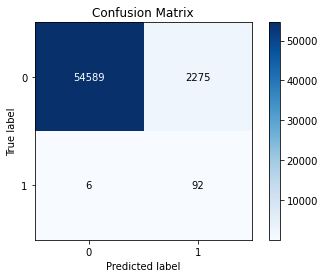

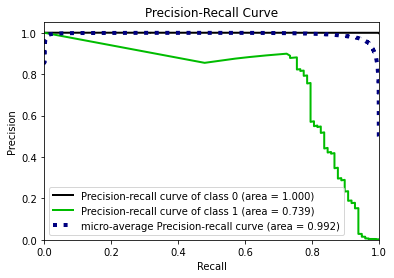

In [61]:
conf_mat = confusion_matrix(Y_test, y_pred)
accuracy = accuracy_score(Y_test, y_pred)
score = precision_recall_fscore_support(Y_test, y_pred, average='weighted')
precision, recall, fscore, k = score
skplt.metrics.plot_confusion_matrix(Y_test, y_pred)
skplt.metrics.plot_precision_recall_curve(Y_test, y_score)
print(classification_report(Y_test, y_pred))
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F score:",fscore)

### Oversampling Class 1

In [0]:
sm = SMOTE(random_state = 2) 
X_train_os, Y_train_os = sm.fit_sample(X_train, Y_train.ravel())

In [71]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_os.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(Y_train_os.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(Y_train_os == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(Y_train_os == 0))) 

After OverSampling, the shape of train_X: (454902, 30)
After OverSampling, the shape of train_y: (454902,) 

After OverSampling, counts of label '1': 227451
After OverSampling, counts of label '0': 227451


In [0]:
log_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [74]:
log_model = GridSearchCV(LogisticRegression(), log_params,cv=5, n_jobs=-1,scoring='recall')
log_model.fit(X_train_os,Y_train_os)
print(log_model.best_params_)
print(log_model.best_score_)

{'C': 10, 'penalty': 'l2'}
0.9609190382929069


In [0]:
log_model = LogisticRegression(C=10,penalty='l2',random_state=42)
log_model.fit(X_train_os, Y_train_os)

y_score = log_model.predict_proba(X_test)

In [76]:
y_pred = log_model.predict(X_test)
Logit_test = metrics.recall_score(Y_test, y_pred)
print("Logistic test score:",Logit_test)

Logistic test score: 0.9693877551020408


              precision    recall  f1-score   support

           0       1.00      0.63      0.78     56864
           1       0.00      0.97      0.01        98

    accuracy                           0.63     56962
   macro avg       0.50      0.80      0.39     56962
weighted avg       1.00      0.63      0.77     56962

Accuracy: 0.633422281521014
Precision: 0.9982041323870647
Recall: 0.633422281521014
F score: 0.7737996251149887


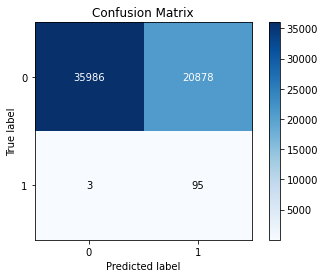

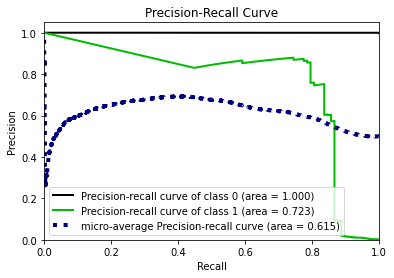

In [77]:
conf_mat = confusion_matrix(Y_test, y_pred)
accuracy = accuracy_score(Y_test, y_pred)
score = precision_recall_fscore_support(Y_test, y_pred, average='weighted')
precision, recall, fscore, k = score
skplt.metrics.plot_confusion_matrix(Y_test, y_pred)
skplt.metrics.plot_precision_recall_curve(Y_test, y_score)
print(classification_report(Y_test, y_pred))
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F score:",fscore)

In [0]:
from bayes_opt import BayesianOptimization
import xgboost as xgb

In [0]:
dtrain = xgb.DMatrix(X_train_os, label=Y_train_os)

#Bayesian Optimization function for xgboost
#specify the parameters you want to tune as keyword arguments
def bo_tune_xgb(max_depth, gamma, n_estimators ,learning_rate):
  params = {'max_depth': int(max_depth),
              'gamma': gamma,
              'n_estimators': int(n_estimators),
              'learning_rate':learning_rate,
              'subsample': 0.8,
              'eta': 0.1,
              'eval_metric': 'auc'}
    #Cross validating with the specified parameters in 5 folds and 70 iterations
  cv_result = xgb.cv(params, dtrain, num_boost_round=70, nfold=5)
    #Return the auc
  return cv_result['test-auc-mean'].iloc[-1]

#Invoking the Bayesian Optimizer with the specified parameters to tune
xgb_bo = BayesianOptimization(bo_tune_xgb, {'max_depth': (3, 10),
                                             'gamma': (0, 1),
                                             'learning_rate':(0,1),
                                             'n_estimators':(100,1000)
                                            })

#performing Bayesian optimization for 5 iterations with 8 steps of random exploration with an #acquisition function of expected improvement
xgb_bo.maximize(n_iter=5, init_points=8, acq='ei')

In [0]:
X_test2 = X_test.to_numpy()

In [0]:
xgb_model = xgb.XGBClassifier(n_estimators=559,learning_rate=0.19,gamma=0.54,max_depth=8)
xgb_model.fit(X_train_os, Y_train_os)

y_score = xgb_model.predict_proba(X_test2)

In [88]:
y_pred = xgb_model.predict(X_test2)
xgb_test = metrics.recall_score(Y_test, y_pred)
print("XGB test score:",xgb_test)

XGB test score: 0.8673469387755102


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.87      0.86        98

    accuracy                           1.00     56962
   macro avg       0.93      0.93      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy: 0.9995259997893332
Precision: 0.9995284783807056
Recall: 0.9995259997893332
F score: 0.9995272007516144


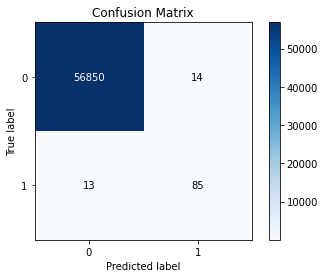

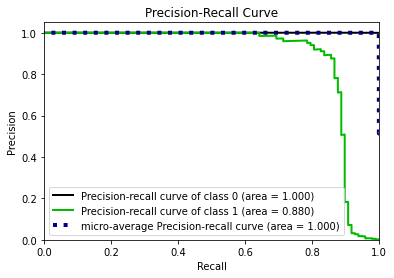

In [89]:
conf_mat = confusion_matrix(Y_test, y_pred)
accuracy = accuracy_score(Y_test, y_pred)
score = precision_recall_fscore_support(Y_test, y_pred, average='weighted')
precision, recall, fscore, k = score
skplt.metrics.plot_confusion_matrix(Y_test, y_pred)
skplt.metrics.plot_precision_recall_curve(Y_test, y_score)
print(classification_report(Y_test, y_pred))
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F score:",fscore)

XGboost is again doing a really good job wrt both precision and recall 

### Undersampling class 0 and Oversampling Class 1

First undersampling the Class 0 to 4000 samples

In [0]:
cc_0 = pd.concat([X_train,Y_train],axis=1)

In [0]:
cc_1 = cc_0[cc_0['Class']==1]
cc_0 = cc_0[cc_0['Class']==0]

We can take a random sample of size 4000 from the class 0.

In [92]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.018, random_state=42)
for train_index, test_index in split.split(cc_0, cc_0['Class']):
    strat_train_set = cc_0.iloc[train_index,:]
    strat_test_set = cc_0.iloc[test_index,:]
strat_test_set.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
100989,67690.0,-1.905138,-0.792979,2.360774,1.442906,0.077575,1.108080,-0.113350,0.511466,-0.232651,-0.203129,1.362718,0.574035,-0.326452,-0.015438,0.938306,-0.516136,0.286336,0.179057,0.330925,0.017309,0.269802,1.032237,0.478889,-0.279127,0.291162,-0.003338,0.121772,0.085971,159.00,0
6677,8276.0,-1.795407,0.042141,2.411993,-2.419381,-0.845119,-0.591750,0.196952,0.002359,2.754128,-1.813778,1.243133,-1.610769,2.499055,0.839129,1.005643,-0.068008,0.262105,0.235553,-1.216443,0.062980,0.087356,0.901703,-0.025541,0.409396,0.472974,-0.026417,0.291909,0.300954,106.18,0
279033,168603.0,-1.147594,-1.278808,1.848793,0.969610,0.301449,0.826650,-0.991076,0.541451,2.031641,-0.668701,-3.099319,-0.151003,-0.506790,-1.395662,-1.826082,0.164940,-0.543046,0.753613,0.162125,-0.450875,0.044233,0.947157,0.817392,-1.019822,-0.001110,-0.449703,0.233072,-0.063968,1.00,0
233838,147725.0,-0.470859,1.608739,-0.871851,0.985544,0.975322,-0.324118,1.224721,-0.172985,-1.492305,-0.096591,1.479980,0.669952,0.846034,-0.584864,0.327190,-1.163311,1.645633,0.690804,2.999636,0.276333,0.176448,0.729257,-0.363761,0.801226,0.175285,1.063565,-0.448536,-0.138970,42.81,0
165910,117745.0,1.823869,-1.133080,-2.412713,-0.649289,0.625340,0.601398,0.106402,0.013514,-1.052035,0.945401,0.645073,0.464803,-0.259792,0.784375,-0.309474,-2.602826,0.557637,-0.025756,-1.183276,-0.435350,-0.092079,0.133090,-0.075003,-1.587680,0.013894,0.926856,-0.081195,-0.084515,149.90,0


In [0]:
us_cc = pd.concat([strat_test_set, cc_1])

In [0]:
us_cc = us_cc.reset_index(drop=True)

In [0]:
X_us_cc = us_cc.drop(['Class'],axis=1)
Y_us_cc = us_cc['Class']

In [0]:
sm = SMOTE(random_state = 2) 
X_train_os, Y_train_os = sm.fit_sample(X_us_cc, Y_us_cc.ravel())

In [98]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_os.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(Y_train_os.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(Y_train_os == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(Y_train_os == 0))) 

After OverSampling, the shape of train_X: (8190, 30)
After OverSampling, the shape of train_y: (8190,) 

After OverSampling, counts of label '1': 4095
After OverSampling, counts of label '0': 4095


In [0]:
log_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [100]:
log_model = GridSearchCV(LogisticRegression(), log_params,cv=5, n_jobs=-1,scoring='recall')
log_model.fit(X_train_os,Y_train_os)
print(log_model.best_params_)
print(log_model.best_score_)

{'C': 1000, 'penalty': 'l2'}
0.9594627594627594


In [0]:
log_model = LogisticRegression(C=1000,penalty='l2',random_state=42)
log_model.fit(X_train_os, Y_train_os)

y_score = log_model.predict_proba(X_test)

In [103]:
y_pred = log_model.predict(X_test)
Logit_test = metrics.recall_score(Y_test, y_pred)
print("Logistic test score:",Logit_test)

Logistic test score: 0.9795918367346939


              precision    recall  f1-score   support

           0       1.00      0.67      0.80     56864
           1       0.01      0.98      0.01        98

    accuracy                           0.67     56962
   macro avg       0.50      0.83      0.41     56962
weighted avg       1.00      0.67      0.80     56962

Accuracy: 0.6727818545697132
Precision: 0.9982361451671266
Recall: 0.6727818545697132
F score: 0.8026261992300863


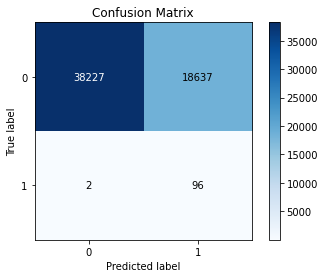

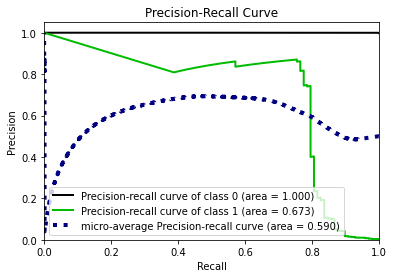

In [104]:
conf_mat = confusion_matrix(Y_test, y_pred)
accuracy = accuracy_score(Y_test, y_pred)
score = precision_recall_fscore_support(Y_test, y_pred, average='weighted')
precision, recall, fscore, k = score
skplt.metrics.plot_confusion_matrix(Y_test, y_pred)
skplt.metrics.plot_precision_recall_curve(Y_test, y_score)
print(classification_report(Y_test, y_pred))
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F score:",fscore)

In [0]:
from bayes_opt import BayesianOptimization
import xgboost as xgb

In [106]:
dtrain = xgb.DMatrix(X_train_os, label=Y_train_os)

#Bayesian Optimization function for xgboost
#specify the parameters you want to tune as keyword arguments
def bo_tune_xgb(max_depth, gamma, n_estimators ,learning_rate):
  params = {'max_depth': int(max_depth),
              'gamma': gamma,
              'n_estimators': int(n_estimators),
              'learning_rate':learning_rate,
              'subsample': 0.8,
              'eta': 0.1,
              'eval_metric': 'auc'}
    #Cross validating with the specified parameters in 5 folds and 70 iterations
  cv_result = xgb.cv(params, dtrain, num_boost_round=70, nfold=5)
    #Return the auc
  return cv_result['test-auc-mean'].iloc[-1]

#Invoking the Bayesian Optimizer with the specified parameters to tune
xgb_bo = BayesianOptimization(bo_tune_xgb, {'max_depth': (3, 10),
                                             'gamma': (0, 1),
                                             'learning_rate':(0,1),
                                             'n_estimators':(100,1000)
                                            })

#performing Bayesian optimization for 5 iterations with 8 steps of random exploration with an #acquisition function of expected improvement
xgb_bo.maximize(n_iter=5, init_points=8, acq='ei')

|   iter    |  target   |   gamma   | learni... | max_depth | n_esti... |
-------------------------------------------------------------------------
|  1        |  0.9963   |  0.7544   |  0.462    |  8.855    |  720.1    |
|  2        |  0.9942   |  0.3196   |  0.7914   |  7.532    |  982.5    |
|  3        |  0.9941   |  0.7588   |  0.7741   |  6.999    |  976.4    |
|  4        |  0.9928   |  0.4804   |  0.914    |  5.334    |  447.6    |
|  5        |  0.9906   |  0.08403  |  0.956    |  6.989    |  436.1    |
|  6        |  0.9931   |  0.3381   |  0.9205   |  4.437    |  303.9    |
|  7        |  0.9959   |  0.4424   |  0.5403   |  3.03     |  768.5    |
|  8        |  0.992    |  0.7937   |  0.9378   |  9.322    |  409.1    |
|  9        |  0.9924   |  0.8145   |  0.953    |  3.082    |  999.9    |
|  10       |  0.9979   |  0.6556   |  0.03058  |  9.095    |  100.2    |
|  11       |  0.9954   |  0.4082   |  0.7009   |  3.159    |  100.6    |
|  12       |  0.9973   |  0.3345   | 

In [0]:
xgb_model = xgb.XGBClassifier(n_estimators=100,learning_rate=0.03,gamma=0.66,max_depth=9)
xgb_model.fit(X_train_os, Y_train_os)

y_score = xgb_model.predict_proba(X_test2)

In [108]:
y_pred = xgb_model.predict(X_test2)
xgb_test = metrics.recall_score(Y_test, y_pred)
print("XGB test score:",xgb_test)

XGB test score: 0.8877551020408163


              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.16      0.89      0.27        98

    accuracy                           0.99     56962
   macro avg       0.58      0.94      0.63     56962
weighted avg       1.00      0.99      0.99     56962

Accuracy: 0.9916962185316527
Precision: 0.9983575386033132
Recall: 0.9916962185316527
F score: 0.9945738191768203


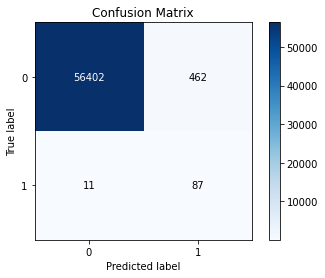

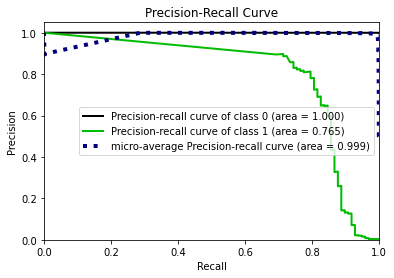

In [109]:
conf_mat = confusion_matrix(Y_test, y_pred)
accuracy = accuracy_score(Y_test, y_pred)
score = precision_recall_fscore_support(Y_test, y_pred, average='weighted')
precision, recall, fscore, k = score
skplt.metrics.plot_confusion_matrix(Y_test, y_pred)
skplt.metrics.plot_precision_recall_curve(Y_test, y_score)
print(classification_report(Y_test, y_pred))
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F score:",fscore)

## Conclusion

Using the SMOTE technique we are able to improve the recall and at the same timemaintain a good precision score